# Analysing customer profile data

Here we seek to obtain understanding of the customer demographics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.eda import *
plt.style.use('ggplot')

In [2]:
# Load data
profile = pd.read_csv('./data/processed/profile.csv')

### Dataset overview

In [3]:
profile.head(10)

,age,became_member_on,gender,id,income
0,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,NaN,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,NaN,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,NaN,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,NaN,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,NaN,8974fc5686fe429db53ddde067b88302,NaN


In [4]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17000 non-null  int64  
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   id                17000 non-null  object 
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [5]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


There are approximately 2200 nulls in `gender` and `income`, interestingly, we have the exact same number of missing gender and income. Let's check if those with missing gender also have missing income. 

In [6]:
# Check how many people with missing gender does not have income missing
(~profile[profile['gender'].isnull()]['income'].isnull()).sum()

0

The above check returns 0, means that those with missing gender also have missing income. For now, I'll ignore those customers. If later analyses determines that `gender` and `income` are important features, I'll look to impute them and re-run the analysis.

In [7]:
profile.dropna(inplace=True)

### Age distribution

According to the dataset's description, customer with age unknown were given 118 as age. Therefore, these values will get replaced as null.

In [8]:
# Replace 118 with null
profile.loc[profile['age'] == 118, 'age'] = np.nan

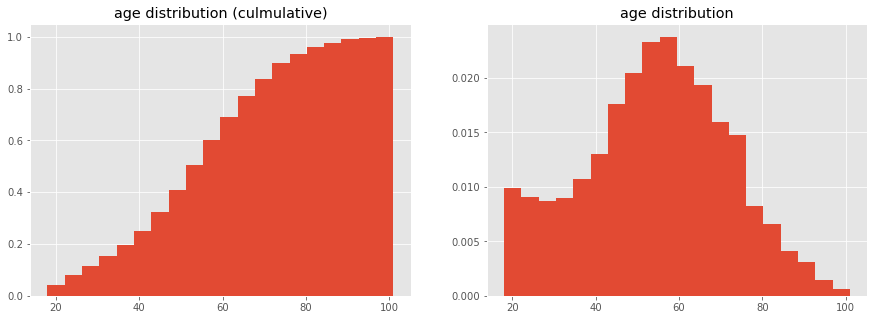

In [9]:
plot_feature_distribution(profile['age'])

It appears that 80% of customers are above 40 year old, which was surprising (for me at least), as Starbucks has always been attributed with the young.

### Income distribution

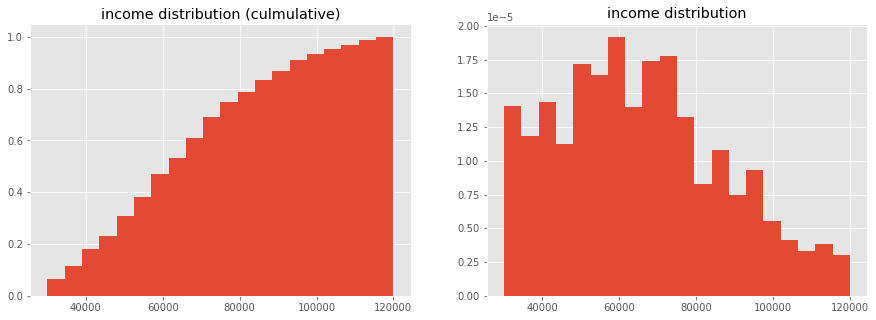

In [10]:
plot_feature_distribution(profile['income'])

Given the median weekly income of a full time salary worker in the US is \$957 per week or ~ $50,000 per annum according to the US Department of Labor [here](https://www.bls.gov/news.release/pdf/wkyeng.pdf), it can be concluded that more than 80% of Starbucks' customers earn more than average.

### Gender distribution

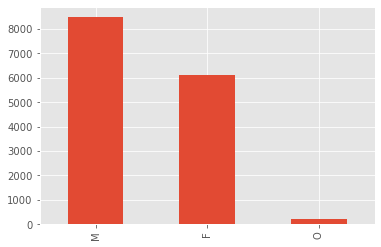

M    8484
F    6129
O     212
Name: gender, dtype: int64


In [11]:
get_category_distribution(profile['gender'])

More than 60% of customers are male, 40% were female and a small percentage are Other, which consists of 212 customers.

### Membership

The `became_member_on` column contains the timestamp when the user registered for membership. In general, it is unlikely that it will be related to customer spending behavior. A potential direction could be to analyse their spending pattern as they progress in their membership life. This requires a reference to measure how long have they been member, which is not available in the dataset. Nevertheless, analysing this could be too big to fit in the scope of this project. Therefore, I'll drop this column from the dataset.



In [12]:
profile.drop('became_member_on', axis=1, inplace=True)

# Rename id to person to be consistent with the transcript dataset
profile.rename(columns={'id': 'person'}, inplace=True)

Now that we're done with the `profile` dataset, let's export it to csv.

In [13]:
profile.to_csv('./data/final/profile.csv', index=False)

print('Exported')

Exported
